In [19]:
using DataFrames

matrix = [111.3 54.5 76.6 129.5  22.5;
          111.6 51.7 72.6 123.5  25.6;
          112.3 48.0 66.9 115.0  30.6;
          113.2 44.2 61.6 106.9  35.6;
          114.7 40.0 54.0  94.1  40.3;
          115.5 36.9 50.4  88.6  45.3;
          116.8 33.4 45.0  79.5  50.6;
          118.0 30.6 40.7  72.6  55.6;
          119.2 28.2 37.0  66.3  60.5;
          120.6 25.8 33.1  59.8  65.4;
          121.4 23.7 30.3  54.8  70.4;
          122.7 21.8 27.4  49.6  75.4;
          124.2 20.0 24.8  45.0  80.5;
          125.8 18.1 22.1  39.8  85.0;
          127.1 16.8 20.3  36.8  90.4;
          128.4 15.6 18.5  33.4  95.4;
          129.8 14.5 16.9  30.5 100.4]

colnames = [:first, :second, :third, :fourth, :temperature]

frame = DataFrame(matrix, colnames)

Row,first,second,third,fourth,temperature
,Float64,Float64,Float64,Float64,Float64
1,111.3,54.5,76.6,129.5,22.5
2,111.6,51.7,72.6,123.5,25.6
3,112.3,48.0,66.9,115.0,30.6
4,113.2,44.2,61.6,106.9,35.6
5,114.7,40.0,54.0,94.1,40.3
6,115.5,36.9,50.4,88.6,45.3
7,116.8,33.4,45.0,79.5,50.6
8,118.0,30.6,40.7,72.6,55.6
9,119.2,28.2,37.0,66.3,60.5


In [20]:
temperature = (t -> t + 273.15).(frame[!, :temperature])
resistivity = frame[!, :fourth]

17-element Vector{Float64}:
 129.5
 123.5
 115.0
 106.9
  94.1
  88.6
  79.5
  72.6
  66.3
  59.8
  54.8
  49.6
  45.0
  39.8
  36.8
  33.4
  30.5

In [44]:
x = (T -> 1000 / T).(temperature)
y = log.(resistivity)

17-element Vector{Float64}:
 4.863680881139593
 4.816241156068032
 4.74493212836325
 4.671893818030999
 4.544358046591334
 4.484131857611035
 4.375757021660286
 4.28496492183075
 4.194189897191817
 4.091005660956586
 4.00369019395397
 3.903990833730882
 3.8066624897703196
 3.6838669122903918
 3.6054978451748854
 3.5085558999826545
 3.417726683613366

In [47]:
round.(y, digits=2)

17-element Vector{Float64}:
 4.86
 4.82
 4.74
 4.67
 4.54
 4.48
 4.38
 4.28
 4.19
 4.09
 4.0
 3.9
 3.81
 3.68
 3.61
 3.51
 3.42

In [51]:
xerr = (T -> μt * 1000 / T^2).(temperature)
yerr = (r -> μΩ(r) / r).(resistivity)

yerr[1]

0.0033325816696466817

In [25]:
using GLM, DataFrames

model = lm(@formula(Y ~ X), DataFrame(X=x, Y=y))
b, a = coef(model)
μb, μa = stderror(model)

2-element Vector{Float64}:
 0.14972643417849663
 0.049569173986403835

a = 2.0766961465100033
b = -2.079615760098877


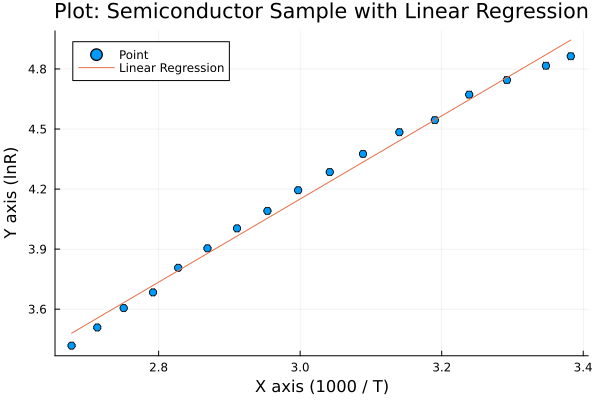

In [28]:
using Plots

scatter(x, y, xerr=xerr, yerr=yerr, label="Point", markersize=4)
xlabel!("X axis (1000 / T)")
ylabel!("Y axis (lnR)")
title!("Plot: Semiconductor Sample with Linear Regression")

@show a b

plot!(x, (x -> a*x + b).(x), label="Linear Regression")

In [29]:
savefig("semiconductor_regression.png")

"/Users/tikhon/Documents/studies/physics-calculations/lab5/semiconductor_regression.png"

In [31]:
@show a μa b μb

a = 2.0766961465100033
μa = 0.049569173986403835
b = -2.079615760098877
μb = 0.14972643417849663


0.14972643417849663

In [36]:
k = 1.3806e-23
J➡eV = 6.242 * 1e18
E = 2000k * a
Ev = E * J➡eV

@show E Ev

E = 5.734173399743421e-20
Ev = 0.3579271036119843


0.3579271036119843

In [38]:
μa * 2000k * J➡eV

0.00854345056844674

In [43]:
temperature = frame[!, :temperature]
first = frame[!, :first]

@show μΩ(first[1])

μΩ(first[1]) = 0.3790304517229893


0.3790304517229893